# Task3- Number Recognition

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 40s 3us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes and softmax activation
])

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2580 - accuracy: 0.9256 - val_loss: 0.1447 - val_accuracy: 0.9562
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1142 - accuracy: 0.9660 - val_loss: 0.0971 - val_accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0766 - accuracy: 0.9775 - val_loss: 0.0778 - val_accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0575 - accuracy: 0.9821 - val_loss: 0.0770 - val_accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0800 - val_accuracy: 0.9744


In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 - 1s - loss: 0.0800 - accuracy: 0.9744 - 1s/epoch - 4ms/step
Test accuracy: 97.44%


In [8]:
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


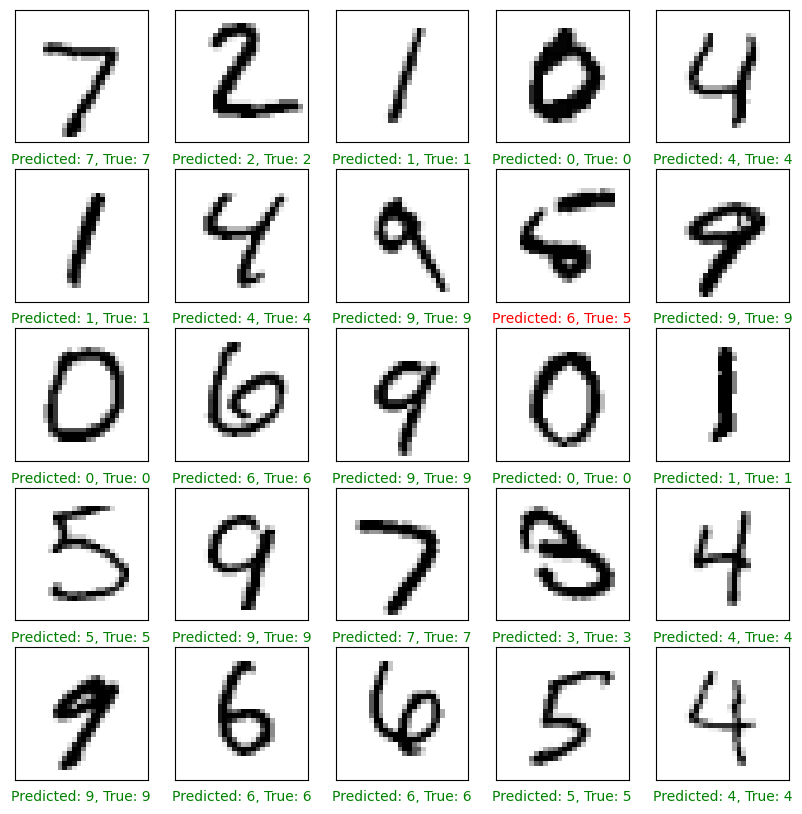

In [10]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}', color=color)
plt.show()

In [11]:
history = model.history.history

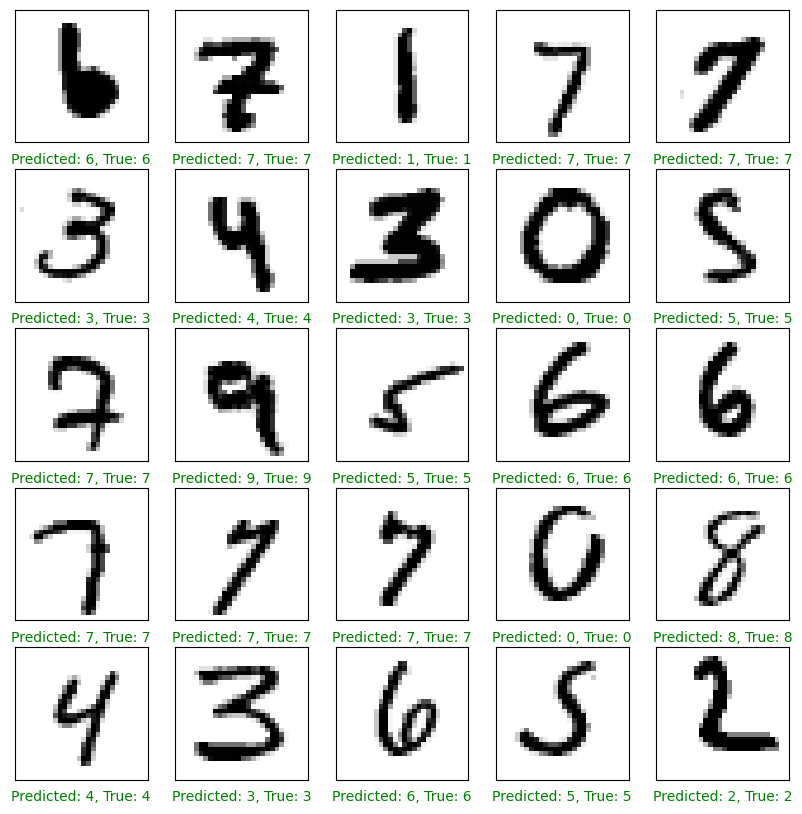

In [13]:
import random

plt.figure(figsize=(10, 10))
for i in range(25):
    index = random.randint(0, len(x_test)-1)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions[index])
    true_label = y_test[index]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f'Predicted: {predicted_label}, True: {true_label}', color=color)
plt.show()

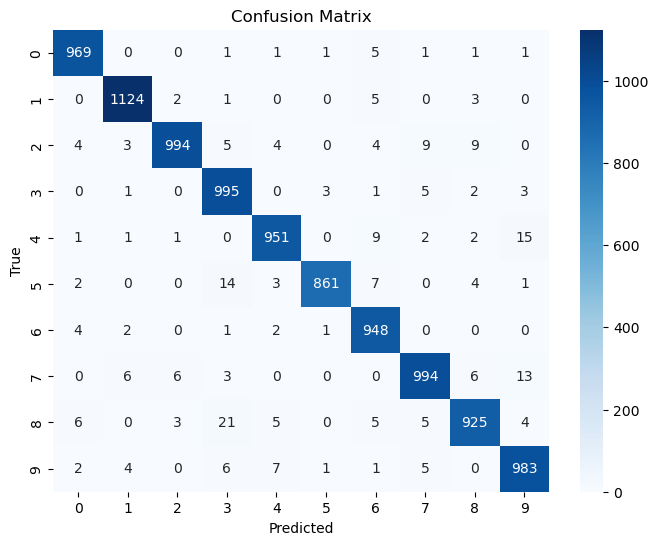

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, [tf.argmax(pred) for pred in predictions])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()